1. Addicative Increase and Multiplicative Decrease (AIMD)

In [73]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
def aimd_plot(MAX_CAPACITY:int, x1:int, x2:int, alpha1:int, alpha2:int, beta1:int=0.5, beta2:int=0.5, output:str='output.svg'):
    """
    Args:
        MAX_CAPACITY (int): Maximum capacity
        x: Initial value
        alpha: Addictive Increase factor for x
        beta: Multiplicative Decrease factor for x
        output: Output filename in svg format. For example, 'mimd.svg'
    """

    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (MAX_CAPACITY - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + MAX_CAPACITY

    # Initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 1000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= MAX_CAPACITY):
            # Addictive Increase
            x1 = x1 + alpha1
            x2 = x2 + alpha1
        else:
            # Multiplicative Decrease
            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, MAX_CAPACITY*1.1, MAX_CAPACITY)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    efficiency_line_x_values = np.linspace(0, MAX_CAPACITY, MAX_CAPACITY)
    efficiency_line_y_values = MAX_CAPACITY - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot AIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, MAX_CAPACITY*1.1)
    plot1.set_ylim(0, MAX_CAPACITY*1.1)

    # Display grid
    plot1.legend(loc='upper right', ncol=2)

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)

    plot_congestion_window(plot2, rtt_values, x1_values, sendingrate_x1, MAX_CAPACITY, iterations, 'Number of Transmissions (RTTs)', 'Congestion Window Size\n(Segments)', 'Congestion Window for $x_{1}$', True)
    plot_congestion_window(plot3, rtt_values, x2_values, sendingrate_x2, MAX_CAPACITY, iterations, 'Number of Transmissions (RTTs)', 'Congestion Window Size\n(Segments)', 'Congestion Window for $x_{2}$', False)

    title = "AIMD"
    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()


def plot_congestion_window(plot, rtt_values, x_values, sending_rate, max_capacity, iterations, x_label, y_label, title, is_plot_two):
    plot.plot(rtt_values, x_values, marker=".", color='black', linewidth=1)
    plot.set_xlabel('Number of Transmissions (RTTs)')
    plot.set_ylabel('Congestion Window Size\n(Segments)')
    plot.set_title(title)
    plot.set_xlim(0, iterations * 1.1)
    if is_plot_two:
        plot.annotate(f'Sending Rate {sending_rate}: {sending_rate:.2f} segment / RTT', xy=(iterations / 2, max_capacity / 8))
    else:
        plot.annotate(f'Sending Rate {sending_rate}: {sending_rate:.2f} segment / RTT', xy=(iterations / 2, max_capacity / 1.8))

    plot.grid(False)



Number of interations to converge:  160
Final x1: 24.9951171875
Final x2: 25.0048828125


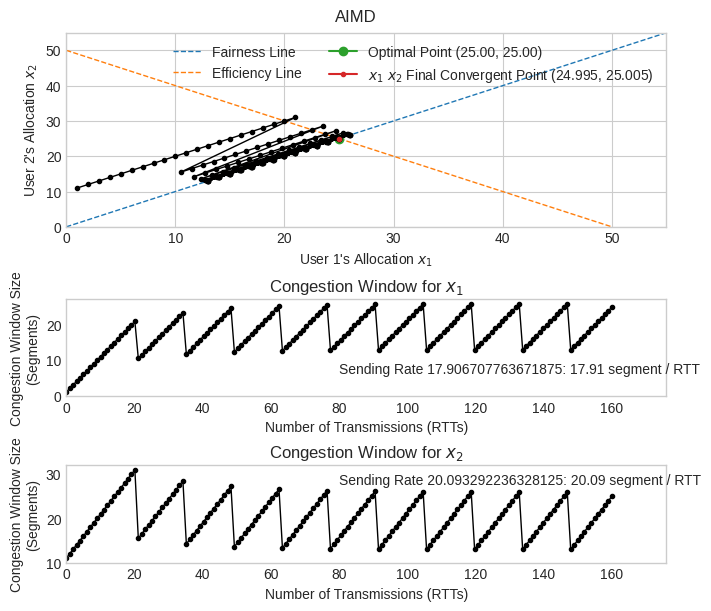

In [74]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

aimd_plot(MAX_CAPACITY=50,
          x1=1,
          x2=11,
          alpha1=1,
          alpha2=1,
          beta1=0.5,
          beta2=0.5,
          output=f"aimd_{formatted_time}.svg"
          )

2. Multiplicative Increase and Multiplicative Decrease (MIMD) for TCP

In [75]:
def mimd_plot(MAX_CAPACITY:int, x1:int, x2:int, alpha1:int, alpha2:int, beta1:int=0.5, beta2:int=0.5, output:str='output.svg'):
    """
    Args:
        MAX_CAPACITY (int): Maximum capacity
        x: Initial value
        alpha: Multiplicative Increase factor for x
        beta: Multiplicative Decrease factor for x
        output: Output filename in svg format. For example, 'mimd.svg'
    """

    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (MAX_CAPACITY - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + MAX_CAPACITY

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 1000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= MAX_CAPACITY):
            # Multiplicative Increase
            x1 = x1 + (alpha1 * x1)
            x2 = x2 + (alpha2 * x1)
        else:
            # Multiplicative Decrease
            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    fairness_line_x_values = np.linspace(0, MAX_CAPACITY*1.1, MAX_CAPACITY)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    efficiency_line_x_values = np.linspace(0, MAX_CAPACITY, MAX_CAPACITY)
    efficiency_line_y_values = MAX_CAPACITY - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot MIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, MAX_CAPACITY*1.1)
    plot1.set_ylim(0, MAX_CAPACITY*1.1)

    # Display grid
    plot1.legend(loc='upper right', ncol=2)

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)

    plot_congestion_window(plot2, rtt_values, x1_values, sendingrate_x1, MAX_CAPACITY, iterations, 'Number of Transmissions (RTTs)', 'Congestion Window Size\n(Segments)', 'Congestion Window for $x_{1}$', True)
    plot_congestion_window(plot3, rtt_values, x2_values, sendingrate_x2, MAX_CAPACITY, iterations, 'Number of Transmissions (RTTs)', 'Congestion Window Size\n(Segments)', 'Congestion Window for $x_{2}$', False)

    title = "MIMD"
    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

def plot_congestion_window(plot, rtt_values, x_values, sending_rate, max_capacity, iterations, x_label, y_label, title, is_plot_two):
    plot.plot(rtt_values, x_values, marker=".", color='black', linewidth=1)
    plot.set_xlabel('Number of Transmissions (RTTs)')
    plot.set_ylabel('Congestion Window Size\n(Segments)')
    plot.set_title(title)
    plot.set_xlim(0, iterations * 1.1)
    if is_plot_two:
        plot.annotate(f'Sending Rate {sending_rate}: {sending_rate:.2f} segment / RTT', xy=(iterations / 2, max_capacity / 6))
    else:
        plot.annotate(f'Sending Rate {sending_rate}: {sending_rate:.2f} segment / RTT', xy=(iterations / 2, max_capacity / 3))


Number of interations to converge:  1000
Final x1: 25.042077451947904
Final x2: 27.546285197142698


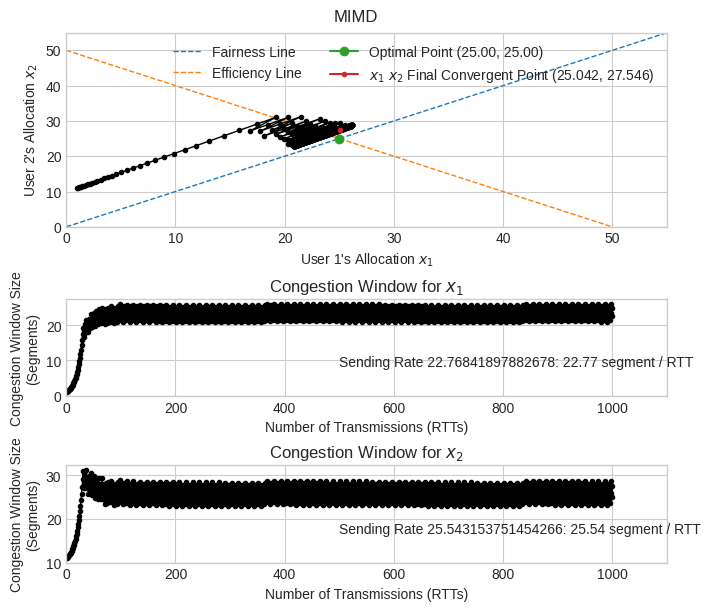

In [76]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

mimd_plot(MAX_CAPACITY=50,
          x1=1,
          x2=11,
          alpha1=0.1,
          alpha2=0.1,
          beta1=0.125,
          beta2=0.125,
          output=f"mimd_{formatted_time}.svg",
          )

Perron-Frobenius Theory for AIMD

In [77]:
import numpy as np

# Define the positive matrix A
betas = np.array([[0.5, 0.5, 0.5]])
alphas = np.array([[1],
                   [1],
                   [1]])
one_minus_betas = 1 - betas

window_sizes = np.array([[2],
                         [5],
                         [12]])

A = np.array([[betas[0][0], 0, 0],
              [0, betas[0][1], 0],
              [0, 0, betas[0][2]]]) + ( 1/np.sum(alphas) * ( np.dot(alphas, one_minus_betas) ))


for i in range(10):
    window_sizes = np.dot(A, window_sizes)
    print(window_sizes)

[[4.16666667]
 [5.66666667]
 [9.16666667]]
[[5.25]
 [6.  ]
 [7.75]]
[[5.79166667]
 [6.16666667]
 [7.04166667]]
[[6.0625]
 [6.25  ]
 [6.6875]]
[[6.19791667]
 [6.29166667]
 [6.51041667]]
[[6.265625]
 [6.3125  ]
 [6.421875]]
[[6.29947917]
 [6.32291667]
 [6.37760417]]
[[6.31640625]
 [6.328125  ]
 [6.35546875]]
[[6.32486979]
 [6.33072917]
 [6.34440104]]
[[6.32910156]
 [6.33203125]
 [6.33886719]]


In [78]:
import numpy as np

def perron_frobenius_right_eigenvector(matrix):
    # Calculate the Perron-Frobenius right eigenvector of a non-negative square matrix.
    # Ensure matrix is non-negative and square
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Find the index of the eigenvalue with the maximum real part
    max_eigenvalue_index = np.argmax(np.real(eigenvalues))

    # Extract the corresponding eigenvector
    perron_frobenius_eigenvector = np.real(eigenvectors[:, max_eigenvalue_index])

    # Normalize the eigenvector
    perron_frobenius_eigenvector /= np.sum(perron_frobenius_eigenvector)

    return perron_frobenius_eigenvector


perron_frobenius_eigenvector = perron_frobenius_right_eigenvector(A)
print("Perron-Frobenius right eigenvector:", perron_frobenius_eigenvector)

Perron-Frobenius right eigenvector: [0.33333333 0.33333333 0.33333333]


In [79]:
import numpy as np

def perron_frobenius(matrix, tol=1e-6, max_iter=1000):
    """
    Args:
      matrix: Non-negative square matrix.
      tol: Tolerance for convergence.
      max_iter: Maximum number of iterations for power iteration method.
    """
    # Ensure matrix is non-negative and square
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    # Initialize a random non-negative initial vector
    n = len(matrix)
    v = np.random.rand(n)
    v /= np.sum(v)

    # Power iteration method
    prev_eigenvalue = 0
    for _ in range(max_iter):
        Av = np.dot(matrix, v)
        eigenvalue = np.dot(v, Av)
        v = Av / np.linalg.norm(Av, ord=np.inf)  # Normalize the vector
        if np.abs(eigenvalue - prev_eigenvalue) < tol:
            break
        prev_eigenvalue = eigenvalue

    # Normalize the eigenvector
    perron_frobenius_eigenvector = v / np.sum(v)

    return eigenvalue, perron_frobenius_eigenvector


perron_frobenius_eigenvalue, perron_frobenius_eigenvector = perron_frobenius(A)
print("Perron-Frobenius eigenvalue:", perron_frobenius_eigenvalue)
print("Perron-Frobenius eigenvector:", perron_frobenius_eigenvector)

Perron-Frobenius eigenvalue: 2.9999991318235635
Perron-Frobenius eigenvector: [0.3333333  0.33333336 0.33333335]
